In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [5]:
df = pd.read_csv(r'I:/Data science books/My book for AI sciences/Notebooks for chapter on projects/Data/Classification/accent-mfcc.csv')
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [6]:
df.describe

<bound method NDFrame.describe of     language         X1        X2        X3         X4        X5         X6  \
0         ES   7.071476 -6.512900  7.650800  11.150783 -7.657312  12.484021   
1         ES  10.982967 -5.157445  3.952060  11.529381 -7.638047  12.136098   
2         ES   7.827108 -5.477472  7.816257   9.187592 -7.172511  11.715299   
3         ES   6.744083 -5.688920  6.546789   9.000183 -6.924963  11.710766   
4         ES   5.836843 -5.326557  7.472265   8.847440 -6.773244  12.677218   
..       ...        ...       ...       ...        ...       ...        ...   
324       US  -0.525273 -3.868338  3.548304   1.496249  3.490753   5.849887   
325       US  -2.094001 -1.073113  1.217397  -0.550790  2.666547   7.449942   
326       US   2.116909 -4.441482  5.350392   3.675396  2.715876   3.682670   
327       US   0.299616  0.324844  3.299919   2.044040  3.634828   6.693840   
328       US   3.214254 -3.135152  1.122691   4.712444  5.926518   6.915566   

            X7   

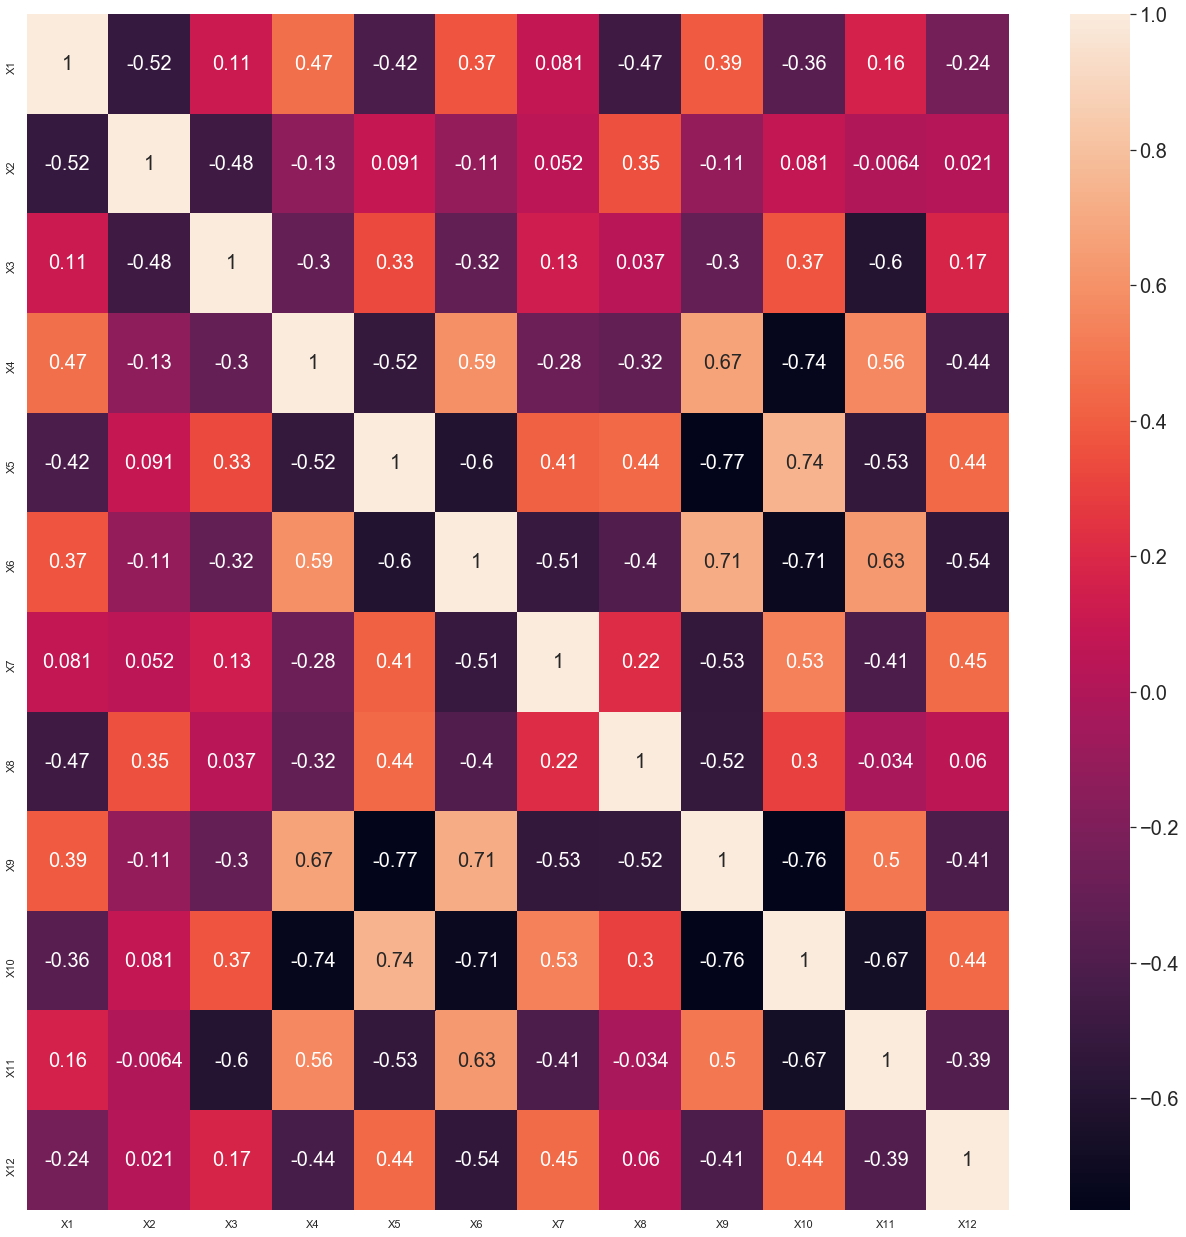

In [7]:
import seaborn as sns
plt.figure(figsize=(22,22))
ax = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 20})

col_ax = plt.gcf().axes[-1]
col_ax.tick_params(labelsize=20)
plt.show()

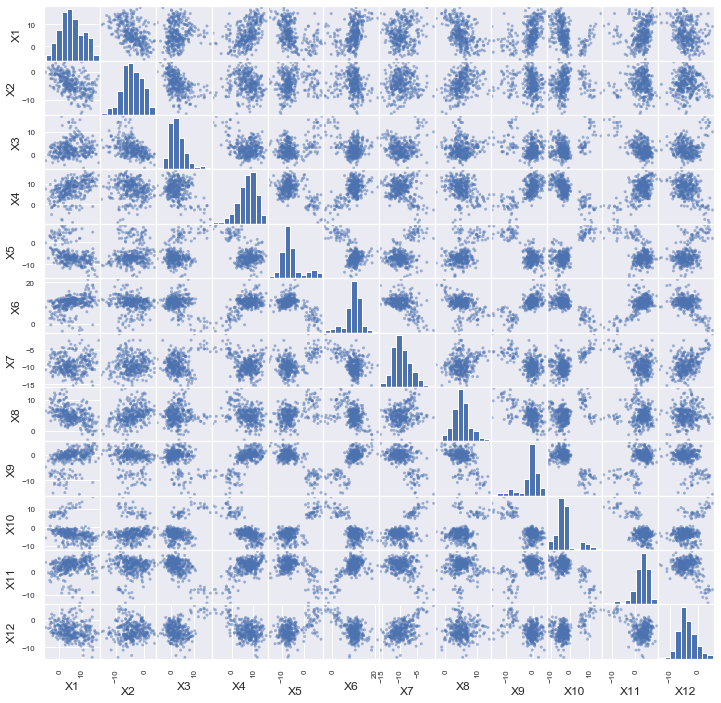

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12, 12), diagonal='hist')
plt.show()

In [9]:
y = np.asarray(df.language)
X = np.asarray(df.drop('language',axis=1))

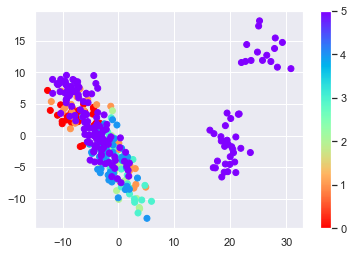

In [12]:
from sklearn.decomposition import PCA

from sklearn import preprocessing

y = np.asarray(df.language)
#creating label Encoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_encoded=le.fit_transform(y)

pca = PCA(n_components=2)
X = np.asarray(df.drop('language',axis=1))
proj = pca.fit_transform(X)
plt.scatter(proj[:, 0], proj[:, 1], c=y_encoded, cmap='rainbow_r') 
plt.colorbar() 
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

M = RandomForestClassifier(100)

M.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred = M.predict(Xtest)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred,target_names=df.language.unique()))

              precision    recall  f1-score   support

          ES       0.75      0.67      0.71         9
          FR       1.00      0.67      0.80        12
          GE       0.50      0.60      0.55         5
          IT       0.43      0.60      0.50         5
          UK       0.67      0.62      0.65        16
          US       0.78      0.83      0.80        52

    accuracy                           0.74        99
   macro avg       0.69      0.66      0.67        99
weighted avg       0.75      0.74      0.74        99



Text(89.18, 0.5, 'predicted label')

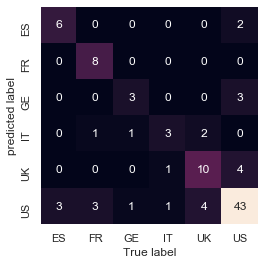

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=df.language.unique(),yticklabels=df.language.unique())
plt.xlabel("True label")
plt.ylabel("predicted label")